In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression

(0, 6)

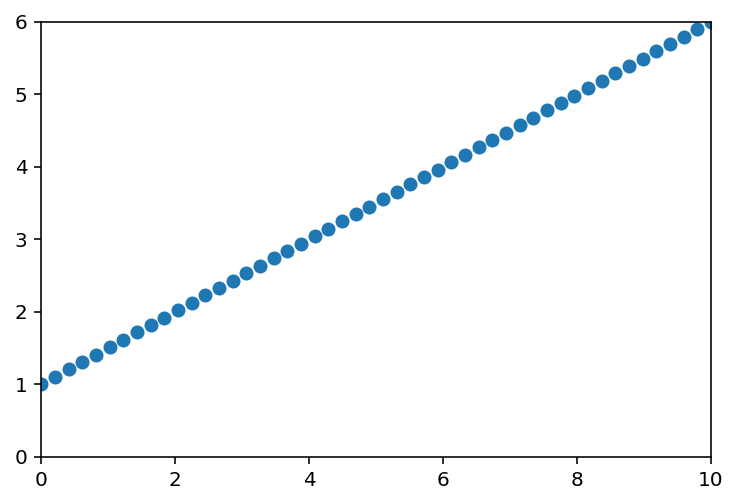

In [7]:
x = np.linspace(0,10,50)
y = 0.5*x + 1
plt.scatter(x, y)
ax = plt.gca()
ax.set_xlim(0,10)
ax.set_ylim(0,6)

the input `X` should be an 2D array  
Each row is the **sample**  
Each column is the **feature**

In [9]:
X = x[:, np.newaxis]
print(x.shape)
print(X.shape)

(50,)
(50, 1)


sklearn process:  
1. select model and hyperparameters
2. `fit(X, y)` 
3. `predict` or `transform`

**Hyperparameters** = the settings of the model

Create some artificial data

In [22]:
x = np.linspace(0,10,50)
y = 0.5*x + 1 + 0.1*np.random.randn(50)
X = x[:, np.newaxis]

In [24]:
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
y_model = model.predict(X)

(0, 6)

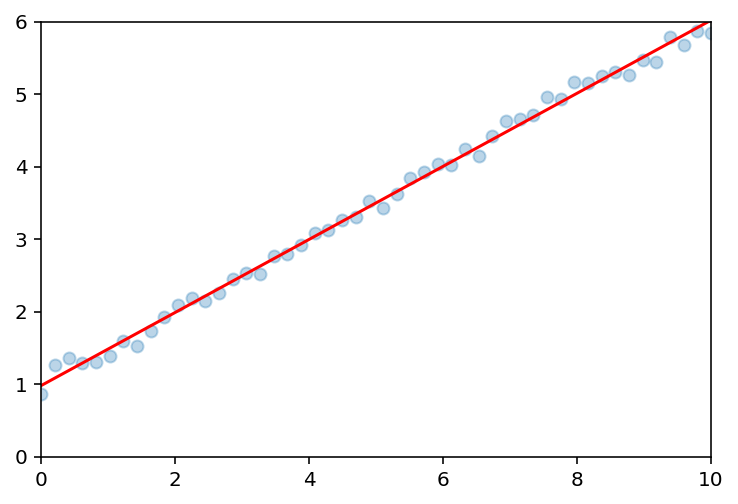

In [25]:
plt.scatter(x, y, alpha=0.3)
plt.plot(x, y_model, color='red')

ax = plt.gca()
ax.set_xlim(0,10)
ax.set_ylim(0,6)

In [26]:
model.coef_

array([0.50389193])

In [27]:
model.intercept_

0.9810323093328495

In [28]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_model = model.predict(X)

(0, 6)

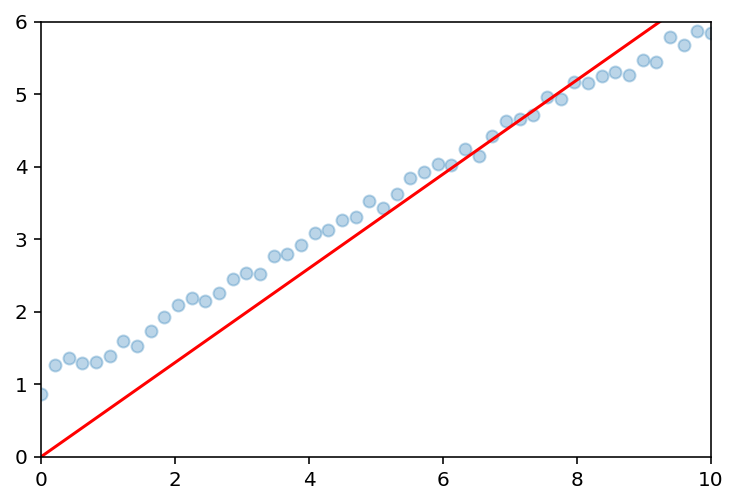

In [29]:
plt.scatter(x, y, alpha=0.3)
plt.plot(x, y_model, color='red')

ax = plt.gca()
ax.set_xlim(0,10)
ax.set_ylim(0,6)

Polynomial?

(0, 10)

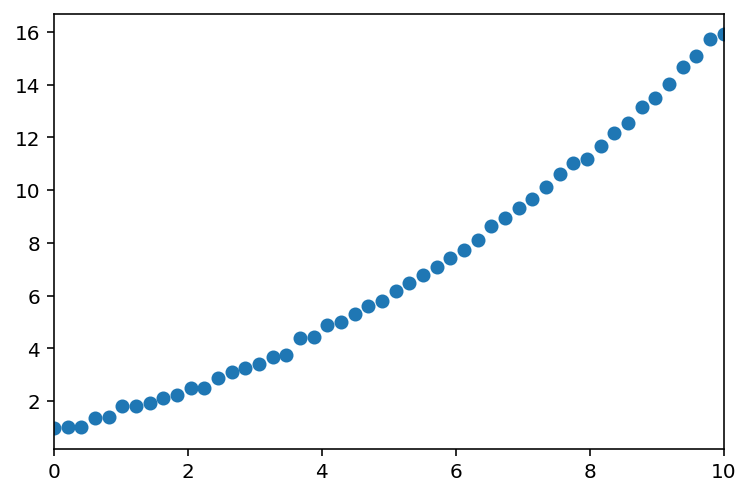

In [32]:
x = np.linspace(0,10,50)
y = 0.1*x**2 + 0.5*x + 1 + 0.1*np.random.randn(50)
X = x[:, np.newaxis]
plt.scatter(x, y)
ax = plt.gca()
ax.set_xlim(0,10)

(0, 10)

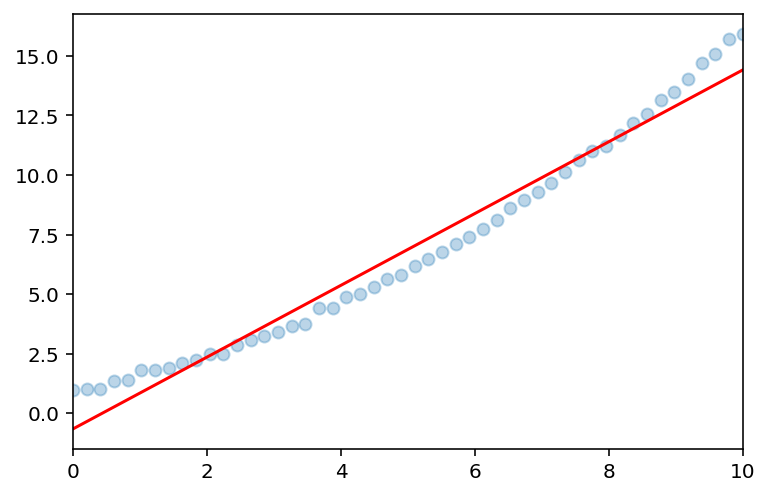

In [34]:
model = LinearRegression()
model.fit(X, y)
y_model = model.predict(X)

plt.scatter(x, y, alpha=0.3)
plt.plot(x, y_model, color='red')

ax = plt.gca()
ax.set_xlim(0,10)

In [35]:
import pandas as pd

In [42]:
df = pd.DataFrame(X, 
                  columns=['x'])
df['x^2'] = x**2
df['1'] = 1
df = df[['1', 'x', 'x^2']]
df.head()

,1,x,x^2
0,1,0.000000,0.000000
1,1,0.204082,0.041649
2,1,0.408163,0.166597
3,1,0.612245,0.374844
4,1,0.816327,0.666389


In [44]:
new_X = df.values

In [46]:
model = LinearRegression(fit_intercept=False)
model.fit(new_X, y)
y_model = model.predict(new_X)

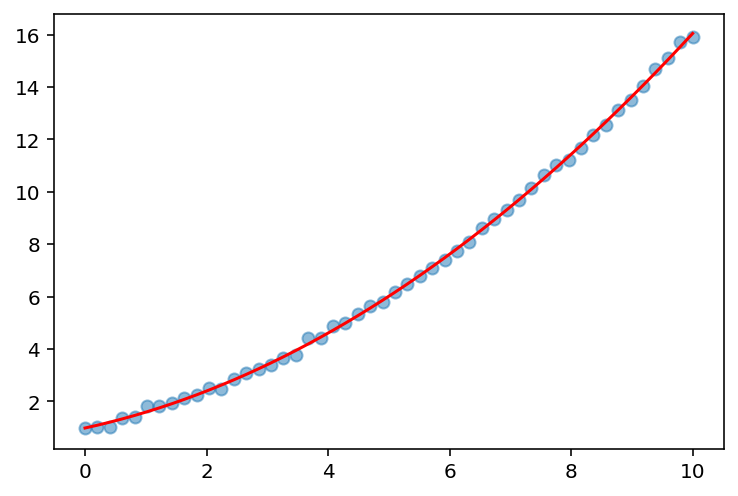

In [47]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_model, color='red')

In [48]:
model.coef_

array([0.98085346, 0.50606076, 0.10001344])

Pipeline

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
change = PolynomialFeatures(degree=2)
change.fit(X)
change.transform(X)

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.04081633e-01, 4.16493128e-02],
       [1.00000000e+00, 4.08163265e-01, 1.66597251e-01],
       [1.00000000e+00, 6.12244898e-01, 3.74843815e-01],
       [1.00000000e+00, 8.16326531e-01, 6.66389005e-01],
       [1.00000000e+00, 1.02040816e+00, 1.04123282e+00],
       [1.00000000e+00, 1.22448980e+00, 1.49937526e+00],
       [1.00000000e+00, 1.42857143e+00, 2.04081633e+00],
       [1.00000000e+00, 1.63265306e+00, 2.66555602e+00],
       [1.00000000e+00, 1.83673469e+00, 3.37359434e+00],
       [1.00000000e+00, 2.04081633e+00, 4.16493128e+00],
       [1.00000000e+00, 2.24489796e+00, 5.03956685e+00],
       [1.00000000e+00, 2.44897959e+00, 5.99750104e+00],
       [1.00000000e+00, 2.65306122e+00, 7.03873386e+00],
       [1.00000000e+00, 2.85714286e+00, 8.16326531e+00],
       [1.00000000e+00, 3.06122449e+00, 9.37109538e+00],
       [1.00000000e+00, 3.26530612e+00, 1.06622241e+01],
       [1.00000000e+00, 3.46938

In [53]:
from sklearn.pipeline import make_pipeline

In [54]:
pipe = make_pipeline(PolynomialFeatures(degree=2), 
              LinearRegression(fit_intercept=False))

In [56]:
pipe.fit(X, y)
y_model = pipe.predict(X)

In [60]:
pipe.steps[1][1].coef_

array([0.98085346, 0.50606076, 0.10001344])